In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001178409"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001178409
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,TIDELANDS BANCSHARES INC
Ticker,TDBK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,13.0,7.860769e+00,2.248898e+00,3.58,7.73,8.76,9.60,9.88
interest income,20.0,6.829637e+06,1.807432e+06,4398532.00,5125388.50,7036246.00,8344172.25,9169087.00
net income,22.0,-9.352732e+05,2.066359e+06,-7905190.00,-1505364.00,-160251.50,144461.50,1650678.00
net interest income,22.0,3.606186e+06,6.762984e+05,2587026.00,3129314.25,3447425.00,3838196.75,5193548.00
provision for loan losses,22.0,1.291185e+06,1.792256e+06,0.00,240750.00,486500.00,1831250.00,6150000.00


# Plots

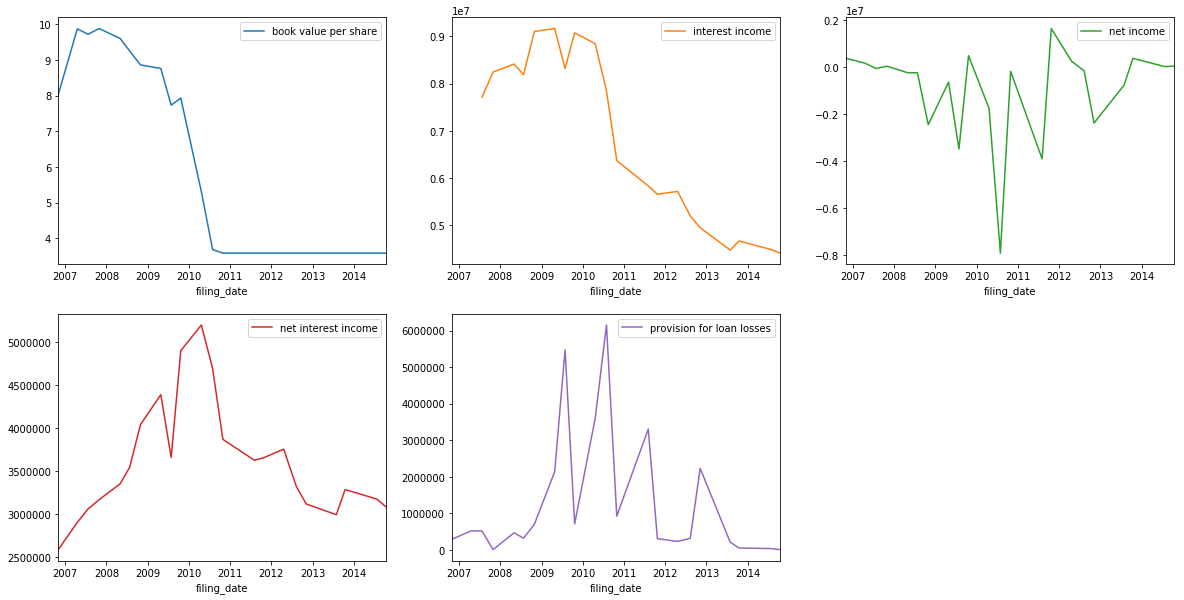

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001178409 book value per share                             2006Q4  missing   
           book value per share                             2007Q4  missing   
           book value per share                             2008Q4  missing   
           book value per share                             2009Q4  missing   
           book value per share       2010Q4 to 2014Q3: 16 periods  missing   
           interest income             2006Q3 to 2007Q1: 3 periods  missing   
           interest income                                  2007Q4  missing   
           interest income                                  2008Q4  missing   
           interest income                                  2009Q4  missing   
           interest income             2010Q4 to 2011Q1: 2 periods  missing   
           interest income                                  2011Q4  missing   
           interest income             2012Q4 to 2013Q1: 2 periods  missing   
           interest income             2013Q4 to 2014Q1: 2 periods  missing   
           net income                                       2006Q4  missing   
           net income                                       2007Q4  missing   
           net income                                       2008Q4  missing   
           net income                                       2009Q4  missing   
           net income                  2010Q4 to 2011Q1: 2 periods  missing   
           net income                                       2011Q4  missing   
           net income                  2012Q4 to 2013Q1: 2 periods  missing   
           net income                  2013Q4 to 2014Q1: 2 periods  missing   
           net interest income                              2006Q4  missing   
           net interest income                              2007Q4  missing   
           net interest income                              2008Q4  missing   
           net interest income                              2009Q4  missing   
           net interest income         2010Q4 to 2011Q1: 2 periods  missing   
           net interest income                              2011Q4  missing   
           net interest income         2012Q4 to 2013Q1: 2 periods  missing   
           net interest income         2013Q4 to 2014Q1: 2 periods  missing   
           provision for loan losses                        2006Q4  missing   
           provision for loan losses                        2007Q4  missing   
           provision for loan losses                        2008Q4  missing   
           provision for loan losses                        2009Q4  missing   
           provision for loan losses   2010Q4 to 2011Q1: 2 periods  missing   
           provision for loan losses                        2011Q4  missing   
           provision for loan losses   2012Q4 to 2013Q1: 2 periods  missing   
           provision for loan losses   2013Q4 to 2014Q1: 2 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001178409 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()